In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings # to ignore deprecation and other warnings
warnings.simplefilter('ignore')# to ignore deprecation and other warnings

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [7]:
#Creating a Data Frame
data = pd.DataFrame(data = boston_dataset.data, columns =boston_dataset.feature_names )
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
#Adding target value to the data frame for easy access
data['PRICE'] = boston_dataset.target
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
#Checking if all columns are equally labeled
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [10]:
#To check if there are any missing data
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [11]:
#Gives the information about the entire data frame
#data.info()

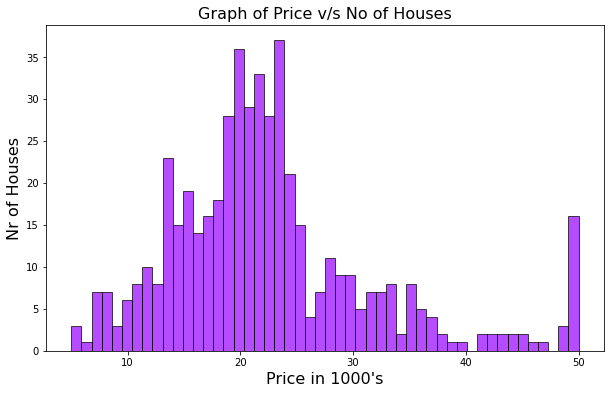

In [12]:
#Visualization of features using Histogram:- Price 
plt.figure(figsize= (10,6))
plt.hist(data['PRICE'], bins =50, ec = 'black', color = '#9800FF', alpha = 0.7)# bins 50...setting color by  hexcode
plt.title("Graph of Price v/s No of Houses",fontsize=16)
plt.xlabel('Price in 1000\'s',fontsize=16)
plt.ylabel('Nr of Houses',fontsize=16)
plt.show()

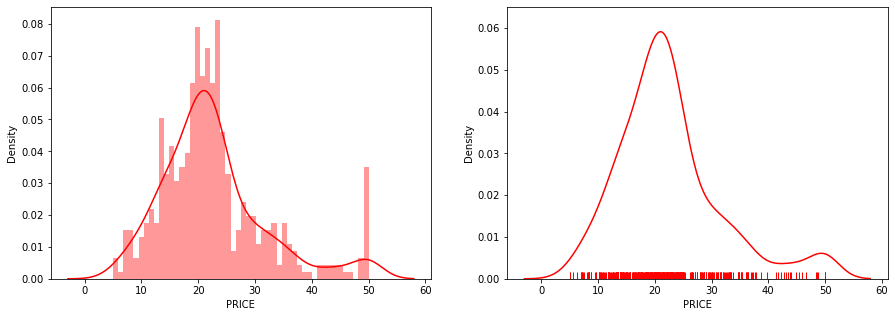

In [13]:
#Visualization of features using Seaborn:- Price 
plt.figure(figsize= (15,5))

plt.subplot(1,2,1)
sns.distplot(data['PRICE'], color = 'red', bins = 50 )

plt.subplot(1,2,2)
sns.distplot(data['PRICE'], color = 'red', bins = 50 , hist = False,rug=True,kde=True)
plt.show()

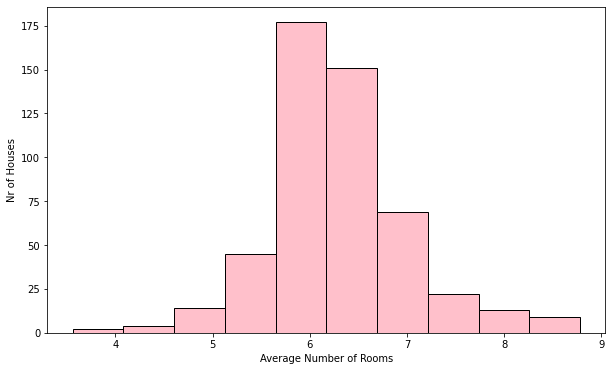

Average Number of Rooms:- 6.284634387351787


In [14]:
#Visualization of features :- No of rooms 
plt.figure(figsize= (10,6))
plt.hist(data['RM'], ec = 'black', color = 'pink')# removed bins
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr of Houses')
plt.show()
print("Average Number of Rooms:-",data['RM'].mean())

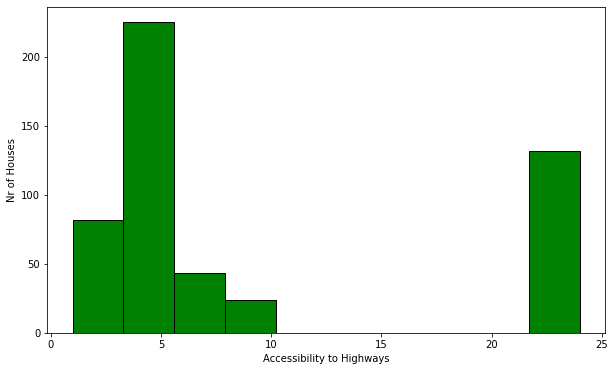

In [15]:
#Visualization of features :- accessibility to radial highways
plt.figure(figsize= (10,6))
plt.hist(data['RAD'], ec = 'black', color = 'green')# using automatic binning.....
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr of Houses')
plt.show()

In [16]:
accessibility = data['RAD'].value_counts()
accessibility

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [17]:
accessibility.index

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')

In [18]:
accessibility.values

array([132, 115, 110,  38,  26,  24,  24,  20,  17], dtype=int64)

In [19]:
data.describe()
#data.median() -->To get median of all the columns
#data.mean() -->To get mean of all the columns
#data.max() -->-->To max median of all the columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
#Calculating Correlation of Price wrt RM
data['PRICE'].corr(data['RM'])

0.695359947071539

In [21]:
#Calculating Correlation of Price wrt PTRATIO
data['PRICE'].corr(data['PTRATIO']) 

-0.5077866855375615

In [22]:
#Corralation of the entire data set
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [23]:
#Visualization of Correlation between features using a heatmap
masker=np.zeros_like(data.corr())
triangle_indices=np.triu_indices_from(masker)
masker[triangle_indices] = True

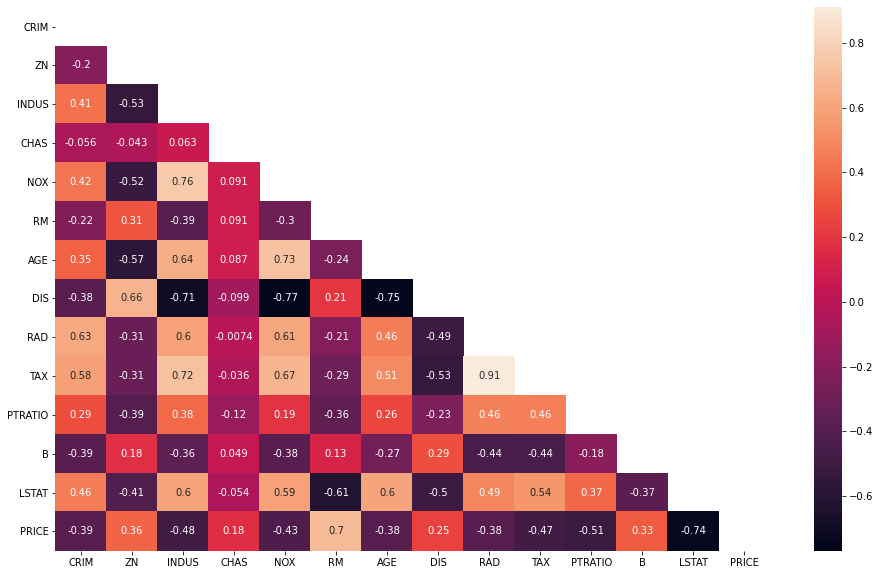

In [24]:
plt.figure(figsize =(16,10))
sns.heatmap(data.corr(), mask = masker, annot = True) 
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

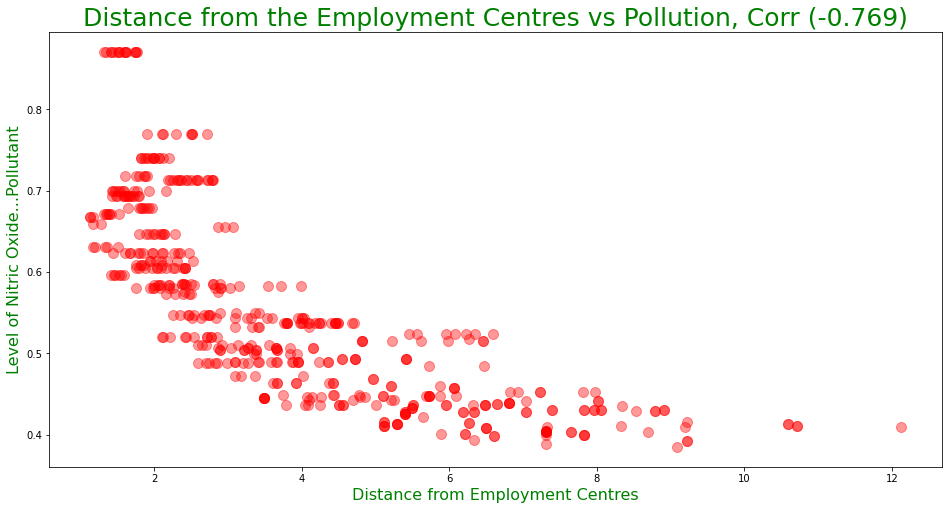

In [25]:
# Correlation visualisations between NOX and DIS
nox_dis_corr=round(data['NOX'].corr(data['DIS']),3)
plt.figure(figsize = (16,8))
plt.title(f'Distance from the Employment Centres vs Pollution, Corr ({nox_dis_corr})', fontsize = 25, color = 'green')
plt.xlabel('Distance from Employment Centres', fontsize = 16, color = 'green')
plt.ylabel('Level of Nitric Oxide...Pollutant', fontsize = 16, color = 'green')
plt.scatter(x = data['DIS'], y = data['NOX'], color = 'red', alpha = 0.4, s = 100)
plt.show()

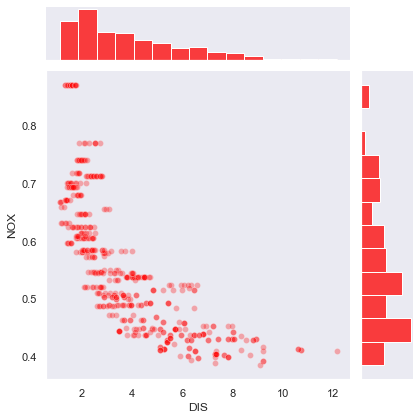

In [26]:
# Correlation visualisations between NOX and DIS using Seaborn
sns.set()
sns.set_style('dark')
sns.jointplot(x = data['DIS'], y = data['NOX'], color = 'red', joint_kws = {'alpha':0.3})
plt.show()

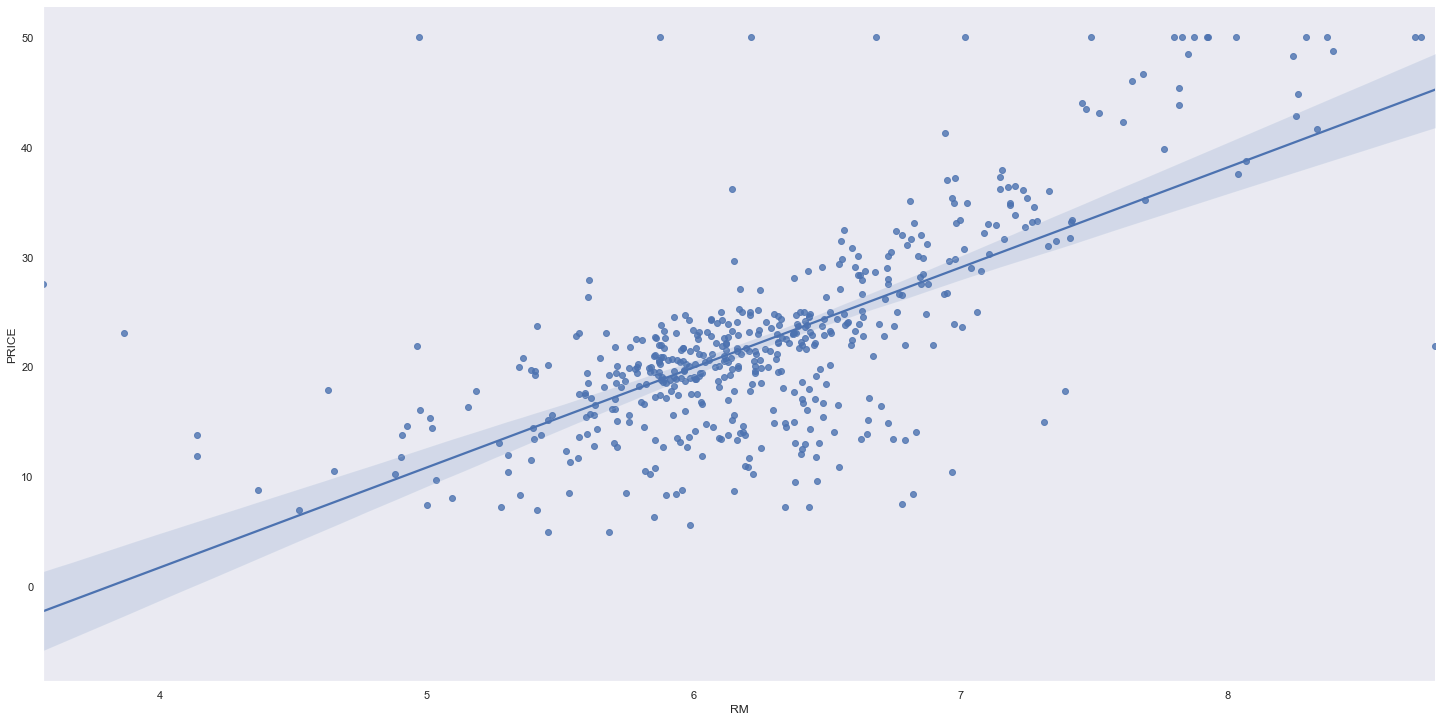

In [27]:
sns.lmplot(x = 'RM', y = 'PRICE', data = data, height = 10, aspect = 2) #Confidence interval
plt.show()

## Train, Test split

In [28]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [29]:
#Splitting Features and Target Value
prices = data['PRICE'] 
features = data.drop('PRICE', axis = 1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 10) #Random_state fixex the value

In [31]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [32]:
regr.coef_

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

In [33]:
regr.intercept_

36.53305138282439

In [34]:
pd.DataFrame(data = regr.coef_ , index = X_train.columns, columns = ['Coef'])

,Coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


SIGNIFICANCE OF COEFFCIENT:-
In simple or multiple linear regression, the size of the coefficient for each independent variable gives you the size of the effect that variable is having on your dependent variable, and the sign on the coefficient (positive or negative) gives you the direction of the effect. In regression with a single independent variable, the coefficient tells you how much the dependent variable is expected to increase (if the coefficient is positive) or decrease (if the coefficient is negative) when that independent variable increases by one. In regression with multiple independent variables, the coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant. Remember to keep in mind the units which your variables are measured in.

In [35]:
print('R squared of the Training data', regr.score(X_train, y_train))

R squared of the Training data 0.750121534530608


In [36]:
print('Test Data R squared', regr.score (X_test, y_test))

Test Data R squared 0.6709339839115628


## DataTransformation

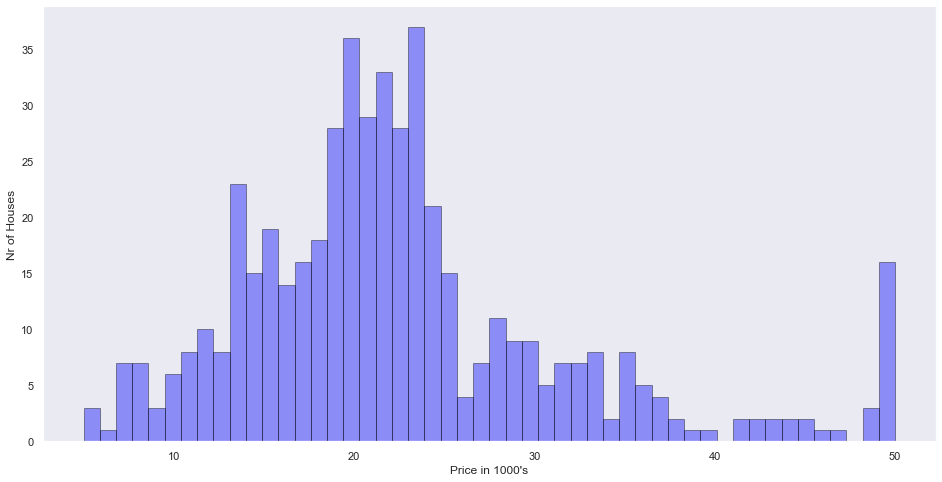

Skewness of Price:- 1.1080984082549072


In [37]:
plt.figure(figsize= (16,8))
plt.hist(data['PRICE'], bins =50, ec = 'black', color = 'blue', alpha = 0.4)# bins 50...setting color by  hexcode
plt.xlabel('Price in 1000\'s')
plt.ylabel('Nr of Houses')
plt.show()
print("Skewness of Price:-",data['PRICE'].skew())

In [38]:
y_log = np.log(data['PRICE'])
y_log.skew()

-0.33032129530987864

In [39]:
print("Skew before transformation:-",data['PRICE'].skew())
print("Skew after transformation:-",y_log.skew())

Skew before transformation:- 1.1080984082549072
Skew after transformation:- -0.33032129530987864


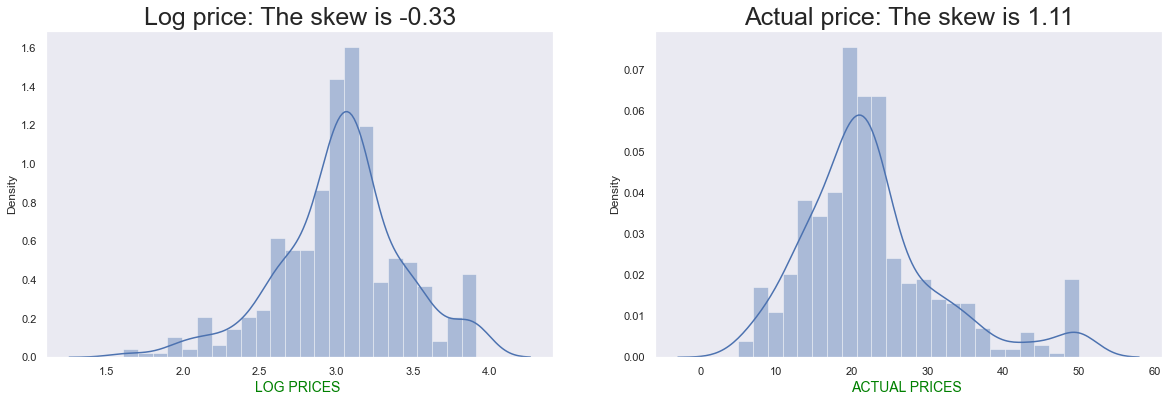

In [40]:
#Visualization of skew
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(y_log)
plt.title(f'Log price: The skew is {round(y_log.skew(),2)}', fontsize = 25)# note the f string used to print the y_log.skew()
plt.xlabel('LOG PRICES ', fontsize =14, color = 'green' )

plt.subplot(1,2,2)
skew=round(data['PRICE'].skew(),2)
sns.distplot(data['PRICE'])
plt.title(f'Actual price: The skew is {skew}', fontsize = 25)
plt.xlabel( 'ACTUAL PRICES ', fontsize =14, color = 'green' )
plt.show()

In [41]:
#Model after reducing skewness
transformed_data = features # new data frame
transformed_data['LOG_PRICE'] = y_log # added the log price to the new data frame called transformed data
transformed_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LOG_PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,3.178054
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,3.072693
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,3.546740
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,3.508556
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,3.589059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,3.109061
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,3.025291
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,3.173878
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,3.091042


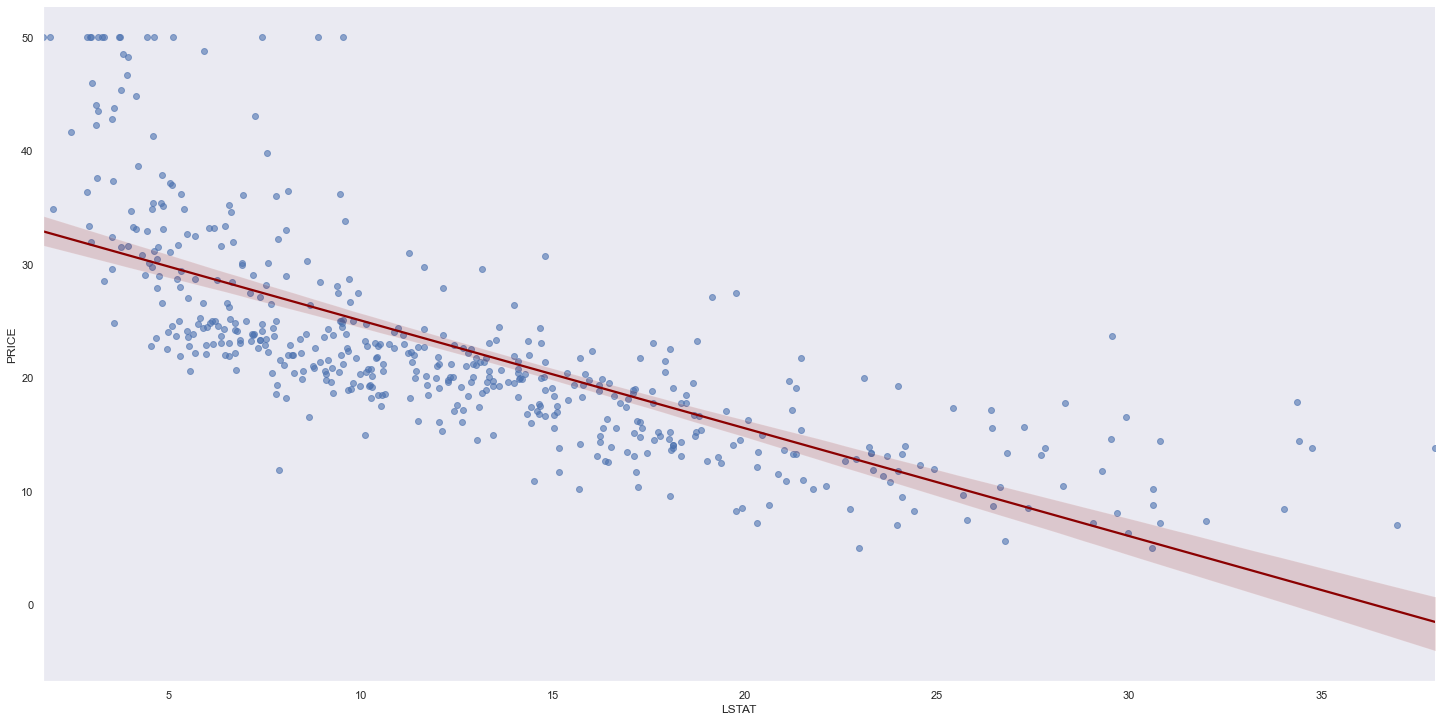

In [42]:
#lmplot before applying the log transformation
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=10, aspect =2, 
           scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})
plt.show()

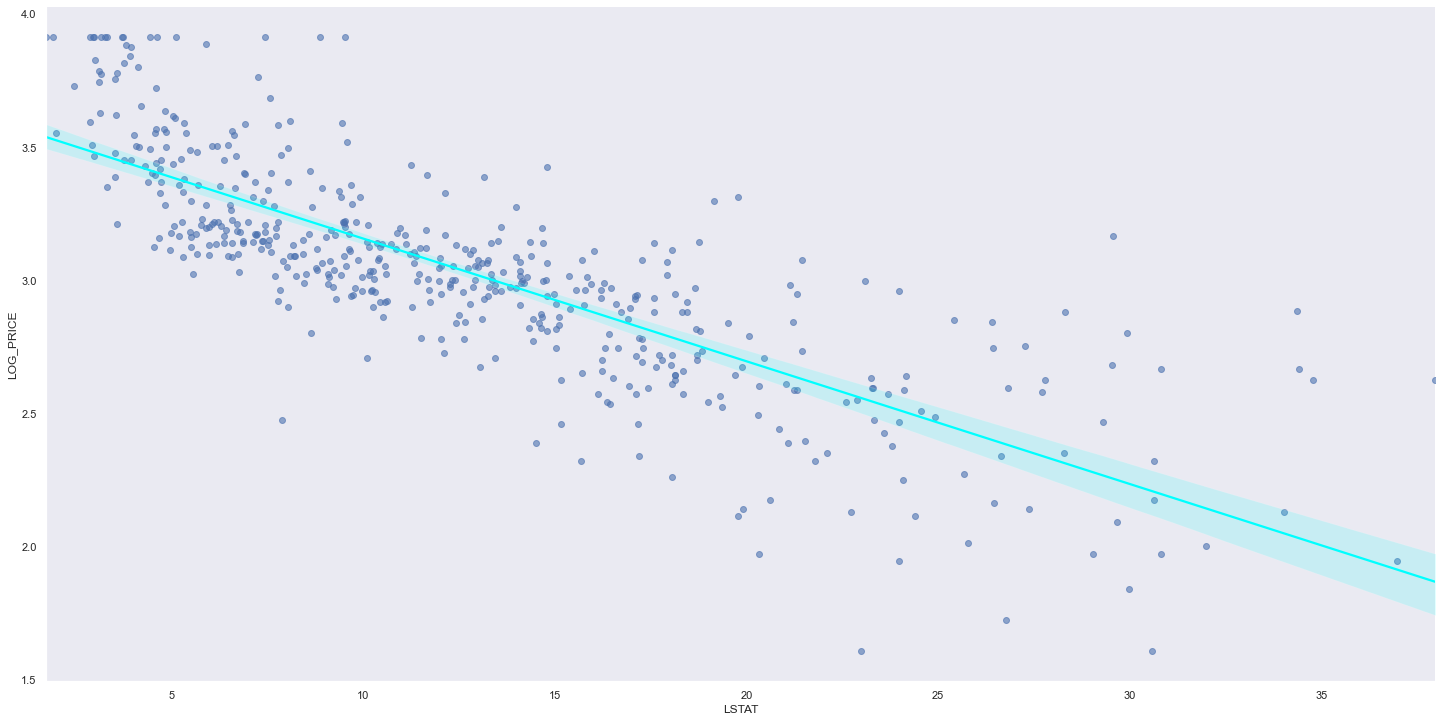

In [43]:
#lmplot after applying the log transformation
sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height =10,aspect = 2, 
           scatter_kws={'alpha': 0.6}, line_kws={'color':'cyan'})
plt.show()

## Regression with the log prices

In [44]:
prices_log = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(features, prices_log, 
                                                    test_size=0.2, random_state=10)

In [46]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [47]:
print('Training data r-squared:', regr.score(X_train, y_train))

Training data r-squared: 0.7930234826697583


In [48]:
print('Test data r-squared:', regr.score(X_test, y_test))

Test data r-squared: 0.7446922306260724


In [49]:
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [50]:
print('Intercept', regr.intercept_)

Intercept 4.05994387177519


## Dropping Features

In [51]:
results = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [52]:
results.params

const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64

In [53]:
results.pvalues

const      1.188124e-52
CRIM       1.753774e-14
ZN         8.607727e-03
INDUS      4.445368e-01
CHAS       3.824015e-02
NOX        2.729624e-05
RM         1.089112e-04
AGE        2.091731e-01
DIS        1.812912e-07
RAD        3.746363e-07
TAX        5.145680e-05
PTRATIO    7.549821e-09
B          6.326839e-06
LSTAT      3.105305e-37
dtype: float64

In [54]:
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


NOTE:-Pick the features with p value > 0.05.
If any features has a p value of more than 0.05 than that feature is not significant....I can drop it from my Model.

If VIF > 10, then we have a problem of multicollinearity.

## To Check Multicollinearity

In [55]:
variance_inflation_factor(exog=sm.add_constant(X_train).values,exog_idx=0) #const

597.5487126763895

In [56]:
variance_inflation_factor(exog=sm.add_constant(X_train).values, exog_idx=1) #CRIM

1.7145250443932485

In [57]:
X_incl_const = sm.add_constant(X_train)
X_incl_const.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,1.0,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,1.0,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.0,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,1.0,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,1.0,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69


In [58]:
vif = []
for i in range(len(X_incl_const.columns)):   
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000578, 4.410320817897635, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [59]:
# Making a dataFrame of VIF values...
pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': np.around(vif, 2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


In [60]:
# Model used is with all the features and the log prices....
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results_1 = model.fit()
org_coef = pd.DataFrame({'coef': results_1.params, 'p-value': round(results_1.pvalues, 3)})
print('BIC with all features and the log price is      :' , results_1.bic, '\n')
print('r-squared is with all features and log price is :' , results_1.rsquared, '\n')
print(org_coef)    # the DataFrame with all the coef's and P values

BIC with all features and the log price is      : -139.74997769478875 

r-squared is with all features and log price is : 0.7930234826697582 

             coef  p-value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000


In [61]:
# Model used is after dropping the INDUS and the log prices....
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis =1)
model = sm.OLS(y_train, X_incl_const)
results_2 = model.fit()
coef_minus_indus = pd.DataFrame({'coef': results_2.params, 'p-value': round(results_2.pvalues, 3)})
print('BIC after dropping "INDUS" and the log price is      :' , results_2.bic, '\n')
print('r-squared after dropping "INDUS" and log price is :' , results_2.rsquared, '\n')
print(coef_minus_indus)    # the DataFrame with all the coef's and P values

BIC after dropping "INDUS" and the log price is      : -145.14508855591163 

r-squared after dropping "INDUS" and log price is : 0.7927126289415163 

             coef  p-value
const    4.056231    0.000
CRIM    -0.010721    0.000
ZN       0.001551    0.010
CHAS     0.082795    0.032
NOX     -0.673365    0.000
RM       0.071739    0.000
AGE      0.000766    0.207
DIS     -0.049394    0.000
RAD      0.014014    0.000
TAX     -0.000596    0.000
PTRATIO -0.034126    0.000
B        0.000511    0.000
LSTAT   -0.031262    0.000


In [62]:
# Model used is after dropping the INDUS and AGE and the log prices....
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis =1)
model = sm.OLS(y_train, X_incl_const)
results_3 = model.fit()
coef_minus_indus_age = pd.DataFrame({'coef': results_3.params, 'p-value': round(results_3.pvalues, 3)})
print('BIC with all features and the log price is      :' , results_3.bic, '\n')
print('r-squared is with all features and log price is :' , results_3.rsquared, '\n')
print(coef_minus_indus_age)    # the DataFrame with all the coef's and P values

BIC with all features and the log price is      : -149.49934294224656 

r-squared is with all features and log price is : 0.7918657661852815 

             coef  p-value
const    4.035922    0.000
CRIM    -0.010702    0.000
ZN       0.001461    0.014
CHAS     0.086449    0.025
NOX     -0.616448    0.000
RM       0.076133    0.000
DIS     -0.052692    0.000
RAD      0.013743    0.000
TAX     -0.000590    0.000
PTRATIO -0.033481    0.000
B        0.000518    0.000
LSTAT   -0.030271    0.000


In [63]:
frames = [org_coef, coef_minus_indus, coef_minus_indus_age]
pd.concat(frames, axis=1, sort = False)

,coef,p-value,coef,p-value,coef,p-value
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


In [64]:
print(f'BIC WITH ALL::   {results_1.bic}: W/O INDUS {results_2.bic}: W/O INDUS AND AGE {results_3.bic} ')

BIC WITH ALL::   -139.74997769478875: W/O INDUS -145.14508855591163: W/O INDUS AND AGE -149.49934294224656 


In [65]:
print(f'RSQD:: WITH ALL {(results_1.rsquared)}: W/O INDUS {results_2.rsquared}: W/O INDUS,AGE {results_3.rsquared}')

RSQD:: WITH ALL 0.7930234826697582: W/O INDUS 0.7927126289415163: W/O INDUS,AGE 0.7918657661852815


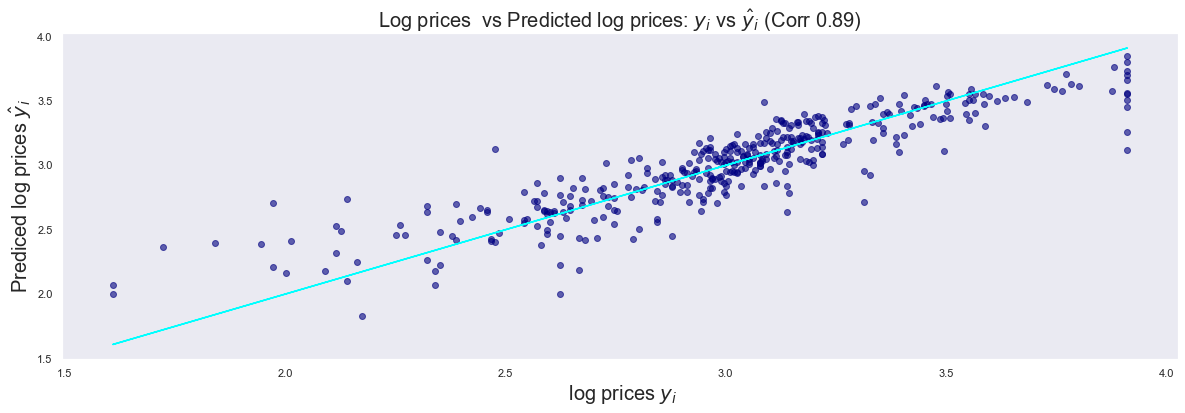

In [80]:
# Modified model: transformed (using log prices) & simplified (dropping two features)
# dropped features are INDUS and AGE
prices = np.log(data['PRICE']) # Use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)# dropping the INDUS , AGE also along with PRICE which has been moved
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)
# Using Statsmodel
results = sm.OLS(y_train, sm.add_constant(X_train)).fit()# obtaining the regression coeffs including the constant(intercept). 
# commented out lines below can be used to look at the residuals.
# 1. # residuals = y_train - results.fittedvalues
# 2. results.resid
# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)# correlation rounded
plt.figure(figsize=(20,6))
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)# gives a scatter plot
plt.plot(y_train, y_train, color='cyan')#the "ideal regression" line......not a reality
plt.xlabel(' log prices $y _i$', fontsize=20)
plt.ylabel('Prediced log prices $\hat y _i$', fontsize=20)
plt.title(f'Log prices  vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=20)
plt.show()

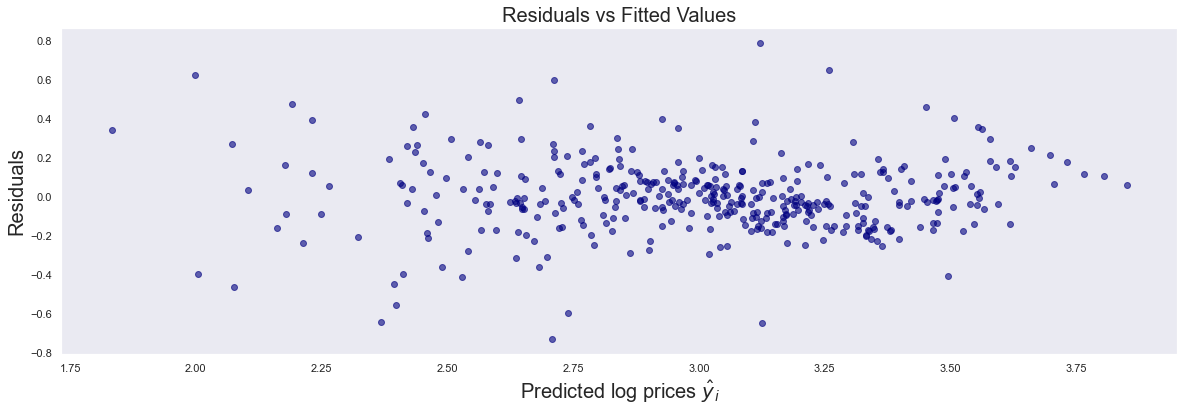

In [81]:
# Residuals vs Predicted values
plt.figure(figsize=(20,6))
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.xlabel('Predicted log prices $\hat y _i$', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs Fitted Values', fontsize=20)
plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)# for later use and comparision
reduced_log_rsquared = round(results.rsquared, 3) # for later use and comparision

In [82]:
# Checking the mean and the skew of the residuals....
# also a distplot..

In [83]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

In [84]:
print(resid_mean, '\n'); print(resid_skew) # printing the mean and skew, both a close to zero

-0.0 

0.118


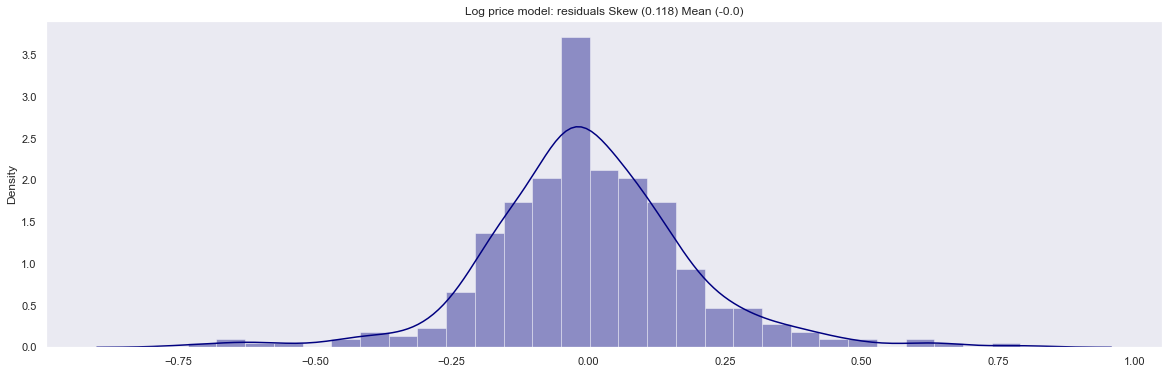

In [85]:
plt.figure(figsize= (20,6))
sns.distplot(results.resid, color='navy')# using the distplot of seaborn
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

1.)Using the original model with all the features and normal prices generate:
#Plot of actual vs predicted prices (incl. correlation) 
#Plot of residuals vs. predicted prices
#Plot of distribution of residuals (incl. skew) 

2.)Analysis of results. prices

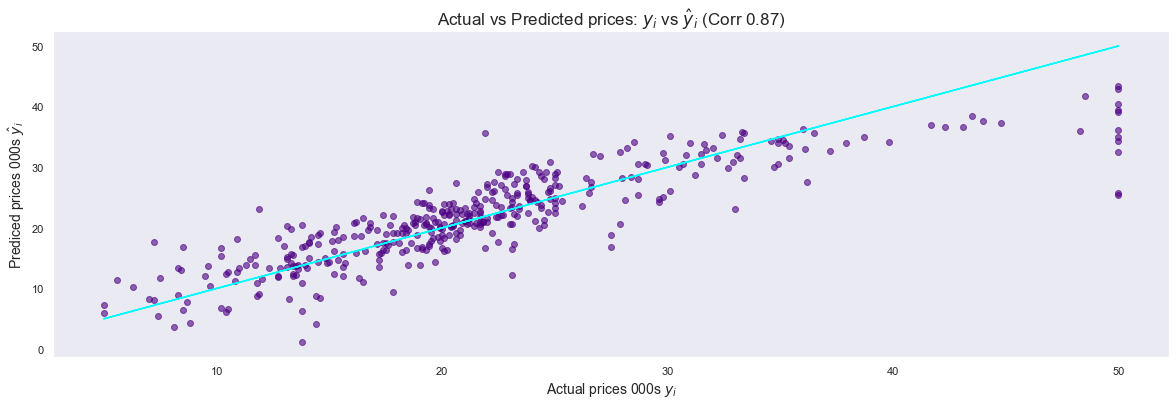

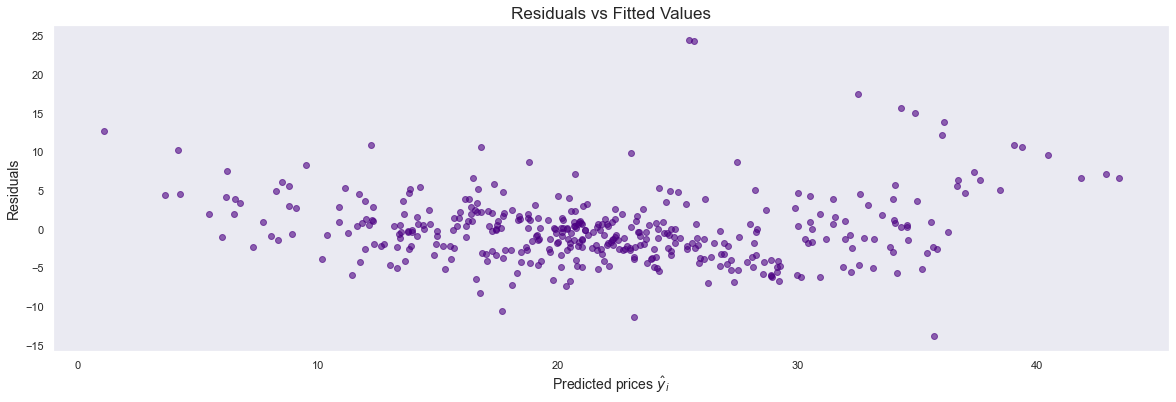

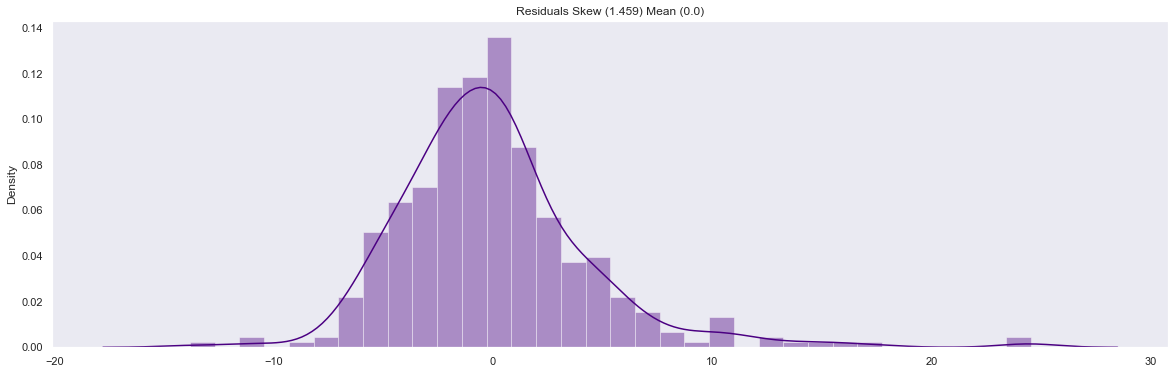

In [72]:
# Original model: normal prices & all features
prices = data['PRICE']
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(20,6))
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.figure(figsize=(20,6))
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Residual Distribution Chart
plt.figure(figsize=(20,6))
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)# for later use
full_normal_rsquared = round(results.rsquared, 3) # for later use

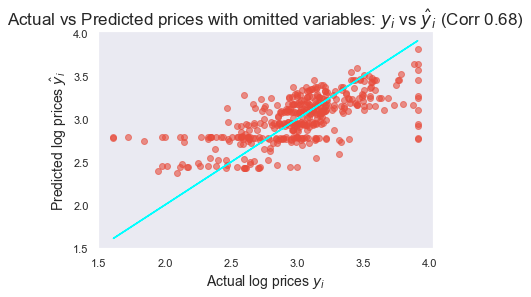

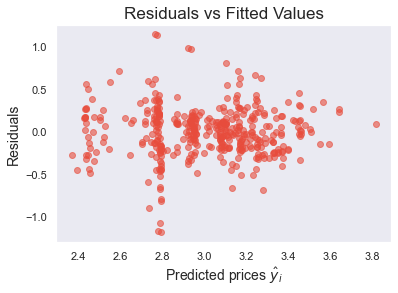

In [73]:
# Test...to show why dropping features at random will not work...using the log model...
# Model Omitting Key Features using log prices
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted variables: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)# for later use
omitted_var_rsquared = round(results.rsquared, 3)# for later use

In [74]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
                 'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse]}, 
                     index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

,R-Squared,MSE
Reduced Log Model,0.792,0.035
Full Normal Price Model,0.750,19.921
Omitted Var Model,0.460,0.090


In [75]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
             'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse], 
             'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])},# taking the square root of MSE to get RMSE. 
            index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

,R-Squared,MSE,RMSE
Reduced Log Model,0.792,0.035,0.187083
Full Normal Price Model,0.750,19.921,4.463295
Omitted Var Model,0.460,0.090,0.300000


In [76]:
#Our estimate for a house price is $30,000. Calculate the upper and lower bound
#for a 95% prediction interval using the reduced log model

In [77]:
print('1 s.d. in log prices is', np.sqrt(reduced_log_mse))
print('2 s.d. in log prices is', 2*np.sqrt(reduced_log_mse))
upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound,'\n')
print('The upper bound in normal prices is $', np.e**upper_bound * 1000,'\n')
lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', lower_bound,'\n')
print('The lower bound in normal prices is $', np.e**lower_bound * 1000,'\n')

1 s.d. in log prices is 0.18708286933869708
2 s.d. in log prices is 0.37416573867739417
The upper bound in log prices for a 95% prediction interval is  3.7753631203395495 

The upper bound in normal prices is $ 43613.34233239937 

The lower bound in log prices for a 95% prediction interval is  3.0270316429847615 

The lower bound in normal prices is $ 20635.886906824155 



In [78]:
# micro project....reduced log model...
# Find the price of a house using the Boston pricing data.....
# given it has 3 rooms, and its near the charles river and the PT ratio = 2...
# Your Program should take KB inputs......inputs must be validated....and results should be printed...
# Price....upper bound....lower bound for 1SD and 2SD

In [ ]:
Final Model:

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=3, min_samples_split=1,
           min_weight_fraction_leaf=0.0, random_state=None,
           splitter='best')

House: [11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0,
 1.385, 24, 680.0, 20.2, 332.09, 12.13]
Prediction: [ 20.96776316]

In [87]:
# Modified model: transformed (using log prices) & simplified (dropping two features)
# dropped features are INDUS and AGE
prices = np.log(data['PRICE']) # Use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)# dropping the INDUS , AGE also along with PRICE which has been moved
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)
# Using Statsmodel
results = sm.OLS(y_train, sm.add_constant(X_train)).fit()# obtaining the regression coeffs including the constant(intercept). 
# commented out lines below can be used to look at the residuals.
# 1. # residuals = y_train - results.fittedvalues
# 2. results.resid
# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)# correlation rounded
plt.figure(figsize=(20,6))
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)# gives a scatter plot
plt.plot(y_train, y_train, color='cyan')#the "ideal regression" line......not a reality
plt.xlabel(' log prices $y _i$', fontsize=20)
plt.ylabel('Prediced log prices $\hat y _i$', fontsize=20)
plt.title(f'Log prices  vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=20)
plt.show()  

TypeError: 'RegressionResultsWrapper' object is not callable